# M2 Example using gridded data

In [113]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xr

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter

import cmocean
print(cmocean.cm.cmapnames)

['thermal', 'haline', 'solar', 'ice', 'gray', 'oxy', 'deep', 'dense', 'algae', 'matter', 'turbid', 'speed', 'amp', 'tempo', 'rain', 'phase', 'topo', 'balance', 'delta', 'curl', 'diff', 'tarn']


In [119]:
server_url='http://downdraft.pmel.noaa.gov:8080/erddap'
dataset = '1hr_gridded_datasets_Mooring_19bsm2a_final'

e = ERDDAP(server=server_url)

e.constraints = None
e.protocol = 'griddap'

opendap_url = e.get_download_url(
    dataset_id=dataset,
    response='opendap',
)

print(opendap_url)

http://downdraft.pmel.noaa.gov:8080/erddap/griddap/1hr_gridded_datasets_Mooring_19bsm2a_final


In [120]:
from netCDF4 import Dataset

with Dataset(opendap_url) as nc:
    print(nc.summary)

QC'd (final) mooring data from 19BSM2A.  This dataset has been gridded to 1hr resolution (with pressure left at discrete depths).  It uses only datasets from the associated erddap tabular datasets_Mooring_19bsm2a_final


In [121]:
e.dataset_id=dataset
e.response = 'nc'
ds = e.to_xarray(decode_times=True)

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

In [122]:
ds

<xarray.Dataset>
Dimensions:                   (depth: 14, time: 3548)
Coordinates:
  * depth                     (depth) float64 9.0 11.0 12.0 ... 50.0 55.0 60.0
  * time                      (time) datetime64[ns] 2019-04-25T05:00:00 ... 2019-09-20
Data variables:
    latitude                  (depth, time) float64 ...
    longitude                 (depth, time) float64 ...
    temperature               (depth, time) float64 ...
    pressure                  (depth, time) float64 ...
    salinity                  (depth, time) float64 ...
    PAR                       (depth, time) float64 ...
    Chlorophyll_Fluorescence  (depth, time) float64 ...
    Oxygen_Saturation         (depth, time) float64 ...
    Oxygen_Concentration      (depth, time) float64 ...
    Serial_Number             (depth, time) float64 ...
Attributes:
    cdm_data_type:                 Grid
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    geospatial_vertical_max:       60.0
    geospatial_vertical_min:       9.0
    geospatial_vertical_positive:  down
    geospatial_vertical_units:     m
    history:                       2020-06-01T18:50:27Z (local files)\n2020-0...
    infoUrl:                       https://pmel.noaa.gov/
    institution:                   NOAA/PMEL - EcoFOCI
    keywords:                      active, available, chemistry, chlorophyll,...
    keywords_vocabulary:           GCMD Science Keywords
    license:                       The data may be used and redistributed for...
    sourceUrl:                     (local files)
    standard_name_vocabulary:      CF Standard Name Table v55
    summary:                       QC'd (final) mooring data from 19BSM2A.  T...
    time_coverage_end:             2019-09-20T00:00:00Z
    time_coverage_start:           2019-04-25T05:00:00Z
    title:                         Gridded Mooring Data from 19BSM2A - final

In [123]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

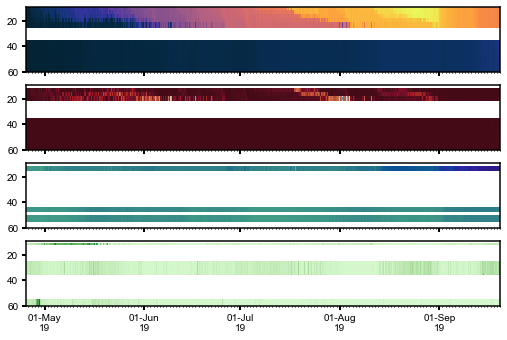

In [124]:

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

ax1.pcolormesh(ds.time,ds.depth,ds.temperature,
                     cmap=cmocean.cm.thermal)
ax2.pcolormesh(ds.time,ds.depth,ds.temperature.diff(dim='depth'),
                     cmap=cmocean.cm.balance)
ax3.pcolormesh(ds.time,ds.depth,ds.salinity,
                     cmap=cmocean.cm.haline)
ax4.pcolormesh(ds.time,ds.depth,ds.Chlorophyll_Fluorescence,
                     cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(MonthLocator())
ax4.xaxis.set_minor_locator(DayLocator())


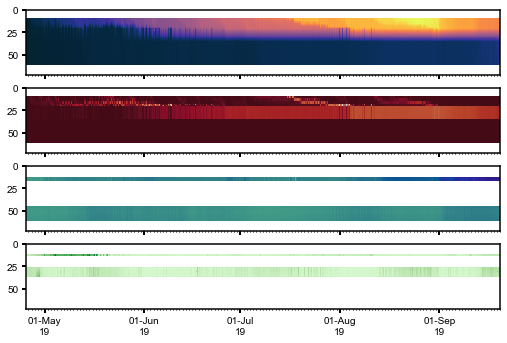

In [130]:
### interp test

newdepth = np.linspace(0, 72,73)

filled = ds.interpolate_na(dim='depth',limit=1)
dsi = filled.interp(depth=newdepth)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

ax1.pcolormesh(dsi.time,dsi.depth,dsi.temperature,
                     cmap=cmocean.cm.thermal)
ax2.pcolormesh(dsi.time,dsi.depth,dsi.temperature.diff(dim='depth'),
                     cmap=cmocean.cm.balance)
ax3.pcolormesh(dsi.time,dsi.depth,dsi.salinity,
                     cmap=cmocean.cm.haline)
ax4.pcolormesh(dsi.time,dsi.depth,dsi.Chlorophyll_Fluorescence,
                     cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(MonthLocator())
ax4.xaxis.set_minor_locator(DayLocator())


In [129]:
### loop over all M2 datasets

e = ERDDAP(server=server_url)
df = pd.read_csv(e.get_search_url(response='csv', search_for='1hr_'))
print(df['Dataset ID'].values)

['1hr_gridded_datasets_Mooring_00bsm2a_final'
 '1hr_gridded_datasets_Mooring_01bs2c_final'
 '1hr_gridded_datasets_Mooring_01bsm2a_final'
 '1hr_gridded_datasets_Mooring_02bs2c_final'
 '1hr_gridded_datasets_Mooring_02bsm2a_final'
 '1hr_gridded_datasets_Mooring_03bs2c_final'
 '1hr_gridded_datasets_Mooring_03bsm2a_final'
 '1hr_gridded_datasets_Mooring_04bs2c_final'
 '1hr_gridded_datasets_Mooring_04bsm2a_final'
 '1hr_gridded_datasets_Mooring_05bs2c_final'
 '1hr_gridded_datasets_Mooring_05bs5a_final'
 '1hr_gridded_datasets_Mooring_05bs5b_final'
 '1hr_gridded_datasets_Mooring_05bs8a_final'
 '1hr_gridded_datasets_Mooring_05bs8b_final'
 '1hr_gridded_datasets_Mooring_05bsm2a_final'
 '1hr_gridded_datasets_Mooring_06bs2c_final'
 '1hr_gridded_datasets_Mooring_06bs5a_final'
 '1hr_gridded_datasets_Mooring_06bs5b_final'
 '1hr_gridded_datasets_Mooring_06bs8a_final'
 '1hr_gridded_datasets_Mooring_06bsm2a_final'
 '1hr_gridded_datasets_Mooring_07bs2c_final'
 '1hr_gridded_datasets_Mooring_07bs5a_final'
 '1

1hr_gridded_datasets_Mooring_00bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_01bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_01bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_02bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_02bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_03bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_03bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_04bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_04bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_05bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_05bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_06bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_06bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_07bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_07bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_08bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_08bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_09bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_09bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_10bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_10bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_11bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_11bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_12bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_12bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_13bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_13bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_14bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_14bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_15bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_15bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_16bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_16bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_17bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_17bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_18bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_18bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_19bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_95bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_96bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_96bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_97bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_97bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_98bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_98bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_99bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_99bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

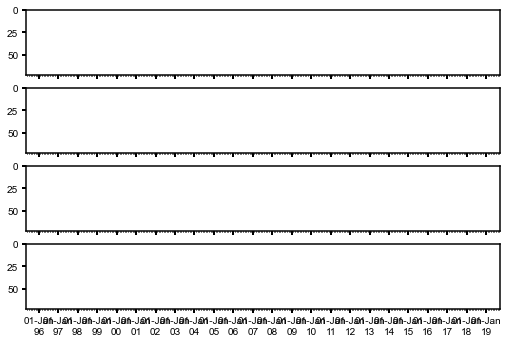

In [133]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

for dataset_id in df['Dataset ID'].values:
    if ('m2a' in dataset_id) or ('bs2c' in dataset_id):
        print(dataset_id)
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.response = 'nc'
        ds = e.to_xarray(decode_times=True)
        
        newdepth = np.linspace(0, 72,73)

        try:
            filled = ds.interpolate_na(dim='depth',limit=2)
            dsi = filled.interp(depth=newdepth)

            ax1.pcolormesh(dsi.time,dsi.depth,dsi.temperature,
                           vmin=-2,vmax=14,
                           cmap=cmocean.cm.thermal)
            ax2.pcolormesh(dsi.time,dsi.depth,dsi.temperature.diff(dim='depth'),
                           vmin=-5,vmax=5,
                           cmap=cmocean.cm.balance)
            ax3.pcolormesh(dsi.time,dsi.depth,dsi.salinity,
                           vmin=31,vmax=32,
                           cmap=cmocean.cm.haline)
            ax4.pcolormesh(dsi.time,dsi.depth,dsi.Chlorophyll_Fluorescence,
                           vmin=0,vmax=20,
                           cmap=cmocean.cm.algae)
        except:
            continue

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(YearLocator())
ax4.xaxis.set_minor_locator(MonthLocator())



1hr_gridded_datasets_Mooring_00bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_01bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_01bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_02bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_02bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_03bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_03bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_04bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_04bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_05bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_05bsm2a_final
1hr_gridded_datasets_Mooring_06bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_06bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_07bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_07bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_08bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_08bsm2a_final
1hr_gridded_datasets_Mooring_09bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_09bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_10bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_10bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_11bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_11bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_12bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_12bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_13bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_13bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_14bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_14bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_15bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_15bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_16bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_16bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_17bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_17bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_18bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_18bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_19bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_95bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_96bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_96bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_97bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_97bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_98bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_98bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_99bs2c_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

1hr_gridded_datasets_Mooring_99bsm2a_final


/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'temperature' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'pressure' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'salinity' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'PAR' has multiple fill values {1e+35, -9999.0}, decoding all values to NaN.
  use_cftime=use_cftime,
/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWa

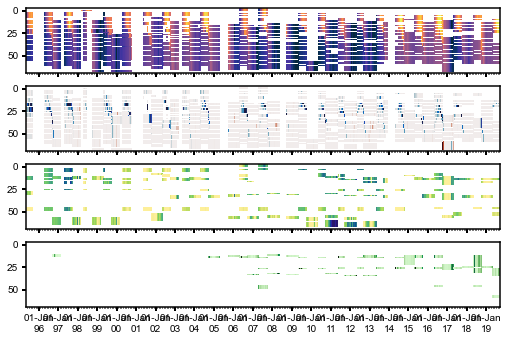

In [132]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, sharex=True, figsize=(8.5,5.5))

for dataset_id in df['Dataset ID'].values:
    if ('m2a' in dataset_id) or ('bs2c' in dataset_id):
        print(dataset_id)
        
        e.protocol = 'griddap'
        e.dataset_id=dataset_id
        e.response = 'nc'
        ds = e.to_xarray(decode_times=True)
        

        ax1.pcolormesh(ds.time,ds.depth,ds.temperature,
                       vmin=-2,vmax=14,
                       cmap=cmocean.cm.thermal)
        ax2.pcolormesh(ds.time,ds.depth,ds.temperature.diff(dim='depth'),
                       vmin=-5,vmax=5,
                       cmap=cmocean.cm.balance)
        ax3.pcolormesh(ds.time,ds.depth,ds.salinity,
                       vmin=31,vmax=32,
                       cmap=cmocean.cm.haline)
        ax4.pcolormesh(ds.time,ds.depth,ds.Chlorophyll_Fluorescence,
                       vmin=0,vmax=20,
                       cmap=cmocean.cm.algae)


ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

xfmt = mdates.DateFormatter('%d-%b\n%y')
ax4.xaxis.set_major_formatter(xfmt)
ax4.xaxis.set_major_locator(YearLocator())
ax4.xaxis.set_minor_locator(MonthLocator())

